In [1]:
# Standard library imports
import string
import re
from io import StringIO

# Third-party library imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import download, pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn import metrics
from wordcloud import WordCloud
from gensim import corpora
from scipy.stats import randint
import contractions
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
import string
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from transformers import BertTokenizer, BertModel
import torch

In [5]:
file_path  = "C:/Users/Ajla/Downloads/lyrics.csv"

In [7]:
data = pd.read_csv(file_path, encoding='latin1')

In [9]:
 pos_mapping = {
    'NN': 'NOUN',
    'NNS': 'NOUN',
    'NNPS': 'NOUN',
    'VB': 'VERB',
    'VBD': 'VERB',
    'VBG': 'VERB',
    'VBN': 'VERB',
    'VBP': 'VERB',
    'VBZ': 'VERB',
    'JJ': 'ADJ',
    'JJR': 'ADJ',
    'JJS': 'ADJ'
}

In [61]:
def preprocess(text):
    
    if not isinstance(text, str):
        return ""

    text = text.split('\n', 1)[-1] #skips the first line
    text = re.sub(r"\*.*?\*", "", text) #skips *word*
    text = contractions.fix(text) #fixes contractions 
    text = re.sub(r"\[.*?\]", "", text) #skips [word]
    text = re.sub(r"\(.*?\)", "", text) #skips (word)
    tokens = word_tokenize(text) 
    tokens = [re.sub(r'[^a-zA-Z]+$', '', word) for word in tokens] #just leaves letters
    tokens = [word.lower() for word in tokens]

    #filler_phrases = ["na", "oh", "doo", "la", "yeah", "da", "hey", "woah", "uh", "ooh", "baby", "love", "know", "get", "got", "want", "time", "going", "make", "see", "go", "let"]
    stop_words = set(stopwords.words('english'))
    #all_stopwords = stop_words.union(set(filler_phrases))
    tokens = [word for word in tokens if word not in stop_words]
    
    if tokens:
        tokens[-1] = re.sub(r'(embed)$', '', tokens[-1]) 
        tokens[-1] = re.sub(r'(\d+)$', '', tokens[-1])  
        
    tokens = [word for word in tokens if word != '']
    
    tagged_tokens = pos_tag(tokens)
    lemmatized_tokens = [
        lemmatizer.lemmatize(word)
        for word, tag in tagged_tokens
        if tag[:2] in pos_mapping and pos_mapping[tag[:2]] in ['NOUN', 'VERB', 'ADJ']
    ]
    
    return " ".join(lemmatized_tokens)

In [13]:
data['cleaned_lyrics'] = data['lyrics'].astype(str).apply(preprocess)

		CLASSIFICATION REPORT

               precision    recall  f1-score   support

          R&B       0.68      0.65      0.66       181
      country       0.75      0.74      0.74       186
rap & hip hop       0.90      0.95      0.92       134
         rock       0.65      0.66      0.65       200

     accuracy                           0.73       701
    macro avg       0.74      0.75      0.75       701
 weighted avg       0.73      0.73      0.73       701



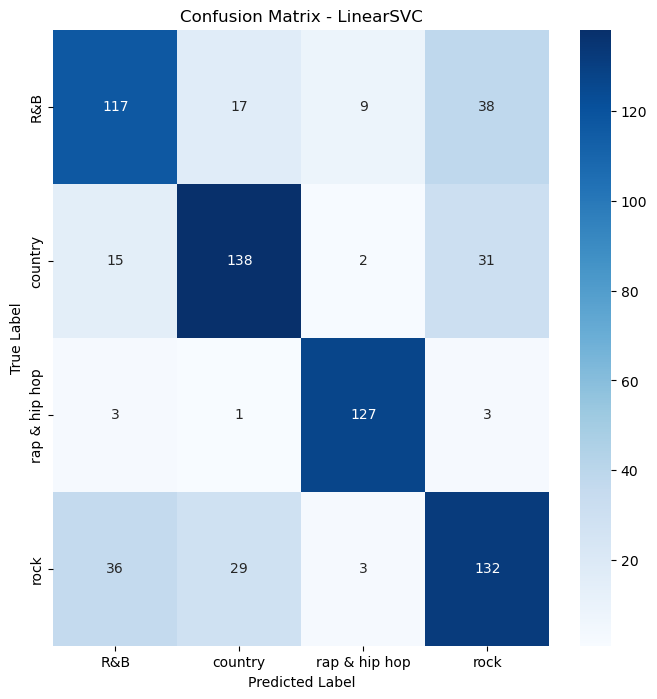

In [53]:
# Convert lyrics into TF-IDF features
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=1, max_df = 0.5, ngram_range=(1, 3), stop_words='english')
X = vectorizer.fit_transform(data['cleaned_lyrics'])
y = data['type']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Train a Linear SVC model
classifier = LinearSVC()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Display classification metrics
print("\t\tCLASSIFICATION REPORT\n")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt='d',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - LinearSVC")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [57]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")

Overall Accuracy: 73.32%


Logistic Regression Accuracy: 0.6805
               precision    recall  f1-score   support

          R&B       0.67      0.59      0.62       181
      country       0.72      0.67      0.69       186
rap & hip hop       0.94      0.81      0.87       134
         rock       0.55      0.69      0.61       200

     accuracy                           0.68       701
    macro avg       0.72      0.69      0.70       701
 weighted avg       0.70      0.68      0.68       701

Random Forest Accuracy: 0.6819
               precision    recall  f1-score   support

          R&B       0.72      0.54      0.62       181
      country       0.74      0.51      0.61       186
rap & hip hop       0.87      0.97      0.92       134
         rock       0.54      0.78      0.64       200

     accuracy                           0.68       701
    macro avg       0.72      0.70      0.69       701
 weighted avg       0.70      0.68      0.68       701

Linear SVC Accuracy: 0.7332
               pre

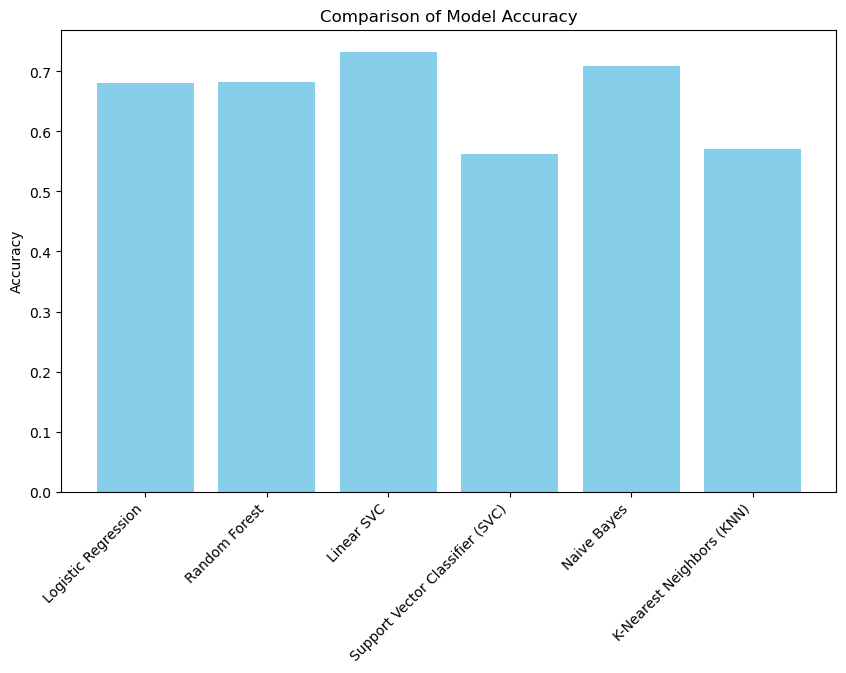

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Define classifiers
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Linear SVC": LinearSVC(),
    "Support Vector Classifier (SVC)": SVC(),
    "Naive Bayes": MultinomialNB(),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier()
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.xticks(rotation=45, ha='right')
plt.show()

In [66]:
def preprocess_input_text(input_text):
    
    cleaned_text = preprocess(input_text)
    return cleaned_text

sample_text = '''
'''
cleaned_sample = preprocess_input_text(sample_text)
print("Cleaned Text:", cleaned_sample)


Cleaned Text: 


In [70]:
def predict_genre(input_text, classifier, vectorizer):
    cleaned_text = preprocess(input_text)
    transformed_text = vectorizer.transform([cleaned_text])
    predicted_genre = classifier.predict(transformed_text)
    return predicted_genre[0]

sample_text = '''
'''
predicted_genre = predict_genre(sample_text, classifier, vectorizer)
print("Predicted Genre:", predicted_genre)


Predicted Genre: rock


In [76]:
def predict_genre(input_text, classifier, vectorizer):
    cleaned_text = preprocess(input_text)
    transformed_text = vectorizer.transform([cleaned_text])
    predicted_genre = classifier.predict(transformed_text)
    return predicted_genre[0]

sample_text = '''

'''
predicted_genre = predict_genre(sample_text, classifier, vectorizer)
print("Predicted Genre:", predicted_genre)


Predicted Genre: rock


In [78]:
def predict_genre(input_text, classifier, vectorizer):
    cleaned_text = preprocess(input_text)
    transformed_text = vectorizer.transform([cleaned_text])
    predicted_genre = classifier.predict(transformed_text)
    return predicted_genre[0]

sample_text = '''
[Intro]
Let's stay together

[Verse 1]
I, I'm so in love with you
Whatever you want to do is all right with me
'Cause you make me feel so brand new
And I want to spend my life with you

[Verse 2]
Let me say that since, baby, since we've been together
Ooh, loving you forever is what I need
Let me be the one you come running to
I'll never be untrue

[Chorus]
Ooh, baby, let's, let's stay together
Lovin' you whether
Whether times are good or bad, happy or sad
Ooh-ooh, ooh, whoo-ooh-hoo, yeah
Whether times are good or bad, happy or sad

[Verse 3]
Why somebody, why people break up
Oh, turn around and make up, I just can't see
You'd never do that to me, would you baby?
Just being around you is all I see, it's what I want to do

[Chorus]
Let's, we ought to stay together (Together)
Lovin' you whether
Whether times are good or bad, happy or sad

[Outro]
C'mon, let's, woo, (Let's stay together) let's stay together
I'll keep on lovin' you whether
Whether times are, oh times are good or times are bad
'''
predicted_genre = predict_genre(sample_text, classifier, vectorizer)
print("Predicted Genre:", predicted_genre)


Predicted Genre: R&B


In [47]:
def predict_genre(input_text, classifier, vectorizer):
    cleaned_text = preprocess(input_text)
    transformed_text = vectorizer.transform([cleaned_text])
    predicted_genre = classifier.predict(transformed_text)
    return predicted_genre[0]

sample_text = '''
[Intro: The Notorious B.I.G.]
("Fuck all you hoes!" Get a grip, motherfucker!)
Yeah, this album is dedicated
To all the teachers that told me I'd never amount to nothin'
To all the people that lived above the buildings that I was hustlin' in front of
Called the police on me when I was just tryin' to make some money to feed my daughter (it's all good)
And all the niggas in the struggle
You know what I'm sayin'? It's all good, baby baby

[Verse 1: The Notorious B.I.G.]
It was all a dream, I used to read Word Up! magazine
Salt-n-Pepa and Heavy D up in the limousine
Hangin' pictures on my wall
Every Saturday Rap Attack, Mr. Magic, Marley Marl
I let my tape rock 'til my tape popped
Smokin' weed in Bambú, sippin' on Private Stock
Way back, when I had the red and black lumberjack
With the hat to match
Remember Rappin' Duke? Duh-ha, duh-ha
You never thought that hip-hop would take it this far
Now I'm in the limelight 'cause I rhyme tight
Time to get paid, blow up like the World Trade
Born sinner, the opposite of a winner
Remember when I used to eat sardines for dinner
Peace to Ron G, Brucie B, Kid Capri
Funkmaster Flex, Lovebug Starski
I'm blowin' up like you thought I would
Call the crib, same number, same hood, it's all good
And if you don't know, now you know, nigga

[Chorus: Total & Puff Daddy]
You know very well (Yeah)
Who you are (Money, hoes and clothes)
Don't let 'em hold you down (Bankrolls, yeah, haha)
Reach for the stars (It's all good)
You had a goal (C'mon)
But not that many (It's all good)
'Cause you're the only one
I'll give you good and plenty (Check it)

[Verse 2: The Notorious B.I.G.]
I made the change from a common thief
To up close and personal with Robin Leach
And I'm far from cheap, I smoke skunk with my peeps all day
Spread love, it's the Brooklyn way
The Moët and Alizé keep me pissy, girls used to diss me
Now they write letters 'cause they miss me
I never thought it could happen, this rapping stuff
I was too used to packing gats and stuff
Now honeys play me close like butter play toast
From the Mississippi down to the East Coast
Condos in Queens, indo for weeks
Sold out seats to hear Biggie Smalls speak
Living life without fear
Puttin' five karats in my baby girl ear
Lunches, brunches, interviews by the pool
Considered a fool 'cause I dropped out of high school
Stereotypes of a black male misunderstood
And it's still all good
And if you don't know, now you know, nigga
[Chorus: Total & Puff Daddy]
You know very well (C'mon)
Who you are (Bankrolls)
Don't let 'em hold you down (Clothes)
Reach for the stars (Mansions)
You had a goal
But not that many (It's all good)
'Cause you're the only one
I'll give you good and plenty ('94)

[Verse 3: The Notorious B.I.G.]
Super Nintendo, Sega Genesis
When I was dead broke, man, I couldn't picture this
50-inch screen, money-green leather sofa
Got two rides, a limousine with a chauffeur
Phone bill about two G's flat
No need to worry, my accountant handles that
And my whole crew is loungin'
Celebrating every day, no more public housin'
Thinkin' back on my one-room shack
Now my mom pimps an Ac' with minks on her back
And she loves to show me off of course
Smiles every time my face is up in The Source
We used to fuss when the landlord dissed us
No heat, wonder why Christmas missed us
Birthdays was the worst days
Now we sip Champagne when we thirsty
Uh, damn right I like the life I live
'Cause I went from negative to positive and it's all (It's all good, nigga)
And if you don't know, now you know, nigga
[Chorus: Total, The Notorious B.I.G. & Puff Daddy]
You know very well (Money)
Who you are (Hoes and clothes)
Don't let 'em hold you down (Bankrolls)
And if you don't know, now you know, nigga
Reach for the stars (That's right)
You had a goal (It's all good)
But not that many (All good)
'Cause you're the only one (East coast, represent)
I'll give you good and plenty (C'mon)
And if you don't know, now you know, nigga

[Post-Chorus: The Notorious B.I.G. & Puff Daddy]
Representin' B-Town in the house (Biggie Smalls)
Junior Mafia, mad flavor (Bad Boy)
Uh, uh, yeah, aight (I see you, Cooch)

[Chorus: Total]
You know very well
Who you are
Don't let 'em hold you down
Reach for the stars
You had a goal
But not that many
'Cause you're the only one
I'll give you good and plenty

[Outro: Puff Daddy & Total]
Biggie Smalls, it's all good, nigga
Junior Mafia, it's all good, nigga
Bad Boy, it's all good, nigga
It's all good
That's right, '94
And on and on, and on and on
You know very well
It's all good
Who you are
Yeah
Don't let 'em hold you down
Reach for the stars

[Produced by Pete Rock and Poke of Trackmasters]
'''
predicted_genre = predict_genre(sample_text, classifier, vectorizer)
print("Predicted Genre:", predicted_genre)


Predicted Genre: rap & hip hop
